In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('./data.csv')

High    293
Low     292
Name: Level, dtype: int64


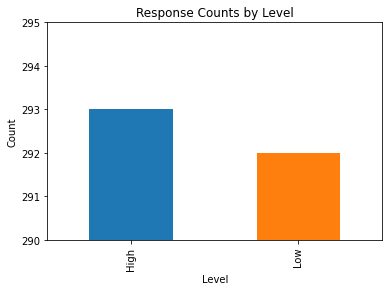

In [72]:
# Group the data by Level and Question, and count the number of occurrences of each question in each level
response_counts = df['Level'].value_counts()
print(response_counts)

# Create a bar graph of the result
ax = response_counts.plot(kind='bar', color=['#1F77B4', '#FF7F0E'])

# Set the title and axis labels
ax.set_title('Response Counts by Level')
ax.set_xlabel('Level')
ax.set_ylabel('Count')

# Set the Y axis scale
ax.set_ylim([290, 295])

# Display the graph
plt.show()


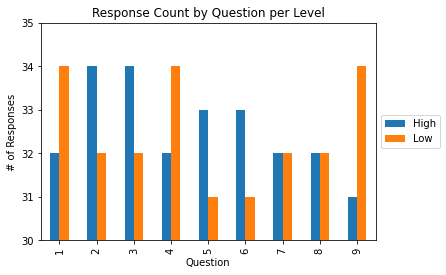

In [73]:
# Group the data by Level and Question, and count the number of occurrences of each question in each level
question_counts = df.groupby(['Level', 'Question']).size()
# Convert the result to a dataframe, and reset the index to make the levels and questions into columns
question_counts_df = question_counts.reset_index(name='Count')

# Pivot the dataframe to make the levels into columns and the questions into rows
pivot_counts = question_counts_df.pivot(index='Question', columns='Level', values='Count')

# Plot the result as a bar graph
ax = pivot_counts.plot(kind='bar')

# Set the title and axis labels
ax.set_title('Response Count by Question per Level')
ax.set_xlabel('Question')
ax.set_ylabel('# of Responses')

# Set the Y axis scale
ax.set_ylim([30, 35])

# Move the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the graph
plt.show()

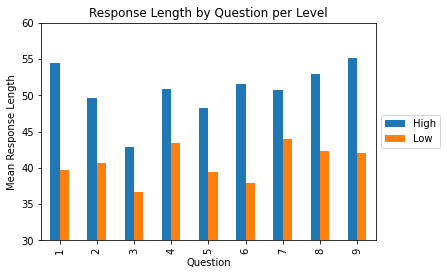

In [74]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the "Response" column and create a new column "Response Length"
df['Response Length'] = df['Response'].apply(count_words)

# Group the data by Level and Question, and calculate the mean response length for each group
mean_response_lengths = df.groupby(['Level', 'Question'])['Response Length'].mean()

# Convert the result to a dataframe, and reset the index to make the levels and questions into columns
mean_response_lengths_df = mean_response_lengths.reset_index(name='Mean Response Length')

# Pivot the dataframe to make the levels into columns and the questions into rows
pivot_lengths = mean_response_lengths_df.pivot(index='Question', columns='Level', values='Mean Response Length')

# Plot the result as a bar graph
ax = pivot_lengths.plot(kind='bar')

# Set the title and axis labels
ax.set_title('Response Length by Question per Level')
ax.set_xlabel('Question')
ax.set_ylabel('Mean Response Length')


# Set the Y axis scale
ax.set_ylim([30, 60])

# Move the legend outside of the graph
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the graph
plt.show()